<a href="https://colab.research.google.com/github/kasireddyasam/AI-course-/blob/main/Secret_Data_Project_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df=pd.read_csv("Classified Data",index_col=0)

In [8]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler() # old-mean of column/(standed_deviation)

In [13]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler()

In [15]:
 scaled_features= scaler.transform(df.drop("TARGET CLASS",axis=1))

In [19]:

pd.DataFrame(scaled_features,columns=df.columns[:-1])

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


#Train_Test_Split

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [22]:
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df["TARGET CLASS"],test_size=0.3,random_state=101)

In [23]:
model=KNeighborsClassifier()

In [24]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [25]:
predict=model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
confusion_matrix(y_test,predict)

array([[154,   5],
       [ 12, 129]])

In [28]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.96      0.91      0.94       141

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



#How to choose best k value
we will be using elbow method to get the best k value

In [29]:
error_rate=[]
for i in range(1,50):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    predict_i=model.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))

In [30]:
error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05,
 0.04,
 0.043333333333333335,
 0.043333333333333335,
 0.043333333333333335,
 0.043333333333333335,
 0.05333333333333334,
 0.05,
 0.06,
 0.056666666666666664,
 0.05333333333333334]

In [31]:
sorted(error_rate)

[0.04,
 0.043333333333333335,
 0.043333333333333335,
 0.043333333333333335,
 0.043333333333333335,
 0.043333333333333335,
 0.043333333333333335,
 0.043333333333333335,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05333333333333334,
 0.05333333333333334,
 0.05333333333333334,
 0.05333333333333334,
 0.05333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.06,
 0.06,
 0.06,
 0.06333333333333334,
 0.06666666666666667,
 0.07,
 0.07666666666666666,
 0.09]

Text(0.5, 0, 'K')

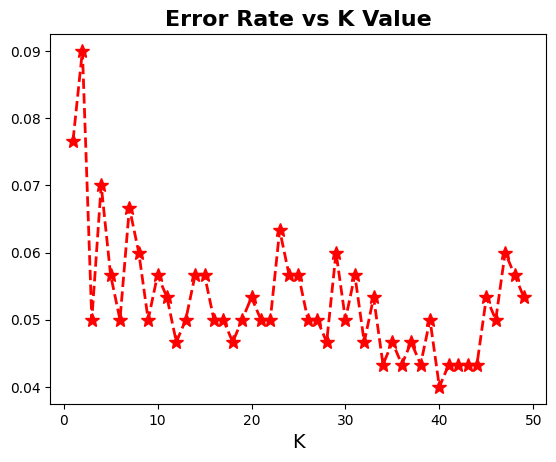

In [41]:
plt.plot(range(1, 50), error_rate, linestyle='--', marker='*', color='red', markersize=10, linewidth=2)
plt.title("Error Rate vs K Value", fontsize=16, fontweight='bold')
plt.xlabel("K", fontsize=14)

In [37]:
model=KNeighborsClassifier(n_neighbors=40)
model.fit(X_train,y_train)
predict_40=model.predict(X_test)
print(classification_report(y_test,predict_40))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [39]:
 confusion_matrix(y_test,predict_40)

array([[154,   5],
       [  7, 134]])